# Postwork Sesión 3

#### Objetivo

- Realizar descarga de archivos desde internet
- Generar nuevos data frames
- Visualizar probabilidades estimadas con la ayuda de gráficas

#### Requisitos

1. R, RStudio
2. Haber realizado el prework y seguir el curso de los ejemplos de la sesión
3. Curiosidad por investigar nuevos tópicos y funciones de R

#### Desarrollo

Ahora graficaremos probabilidades (estimadas) marginales y conjuntas para el número de goles que anotan en un partido el equipo de casa o el equipo visitante.

1. Con el último data frame obtenido en el postwork de la sesión 2, elabora tablas de frecuencias relativas para estimar las siguientes probabilidades:

- La probabilidad (marginal) de que el equipo que juega en casa anote x goles (x=0,1,2,)

- La probabilidad (marginal) de que el equipo que juega como visitante anote y goles (y=0,1,2,)

- La probabilidad (conjunta) de que el equipo que juega en casa anote x goles y el equipo que juega como visitante anote y goles (x=0,1,2,, y=0,1,2,)

2. Realiza lo siguiente:

- Un gráfico de barras para las probabilidades marginales estimadas del número de goles que anota el equipo de casa.
- Un gráfico de barras para las probabilidades marginales estimadas del número de goles que anota el equipo visitante.
- Un HeatMap para las probabilidades conjuntas estimadas de los números de goles que anotan el equipo de casa y el equipo visitante en un partido.

__Notas para los datos de soccer:__ https://www.football-data.co.uk/notes.txt


##### Librerías utilizadas

In [14]:
suppressMessages(suppressWarnings(library(dplyr)))
library(tensor)
library(ggplot2)

Warning message:
"package 'hrbrthemes' was built under R version 3.6.3"

ERROR: Error: package or namespace load failed for 'hrbrthemes' in loadNamespace(i, c(lib.loc, .libPaths()), versionCheck = vI[[i]]):
 namespace 'ggplot2' 3.1.1 is already loaded, but >= 3.3.0 is required


In [13]:
install.packages("hrbrthemes")

also installing the dependency 'ggplot2'




  There is a binary version available but the source version is later:
        binary source needs_compilation
ggplot2  3.3.3  3.3.5             FALSE

package 'hrbrthemes' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\eherr\AppData\Local\Temp\RtmpI9PZCq\downloaded_packages


installing the source package 'ggplot2'



In [2]:
setwd("c:/Users/eherr/OneDrive/Documents/BEDU/ProgramacionYEstadisticaConR/Sesion2/Files/PostworkSesion2")

In [5]:
data_partidos_18_21 <- read.csv("Partidos_18_21.csv")
df_goles <- select(data_partidos_18_21, FTHG, FTAG)
head(df_goles)

FTHG,FTAG
1,0
1,0
2,3
2,2
1,1
0,0


In [6]:
prob_casa <- as.data.frame(prop.table(table(goles = df_goles$FTHG)))
head(prob_casa)

goles,Freq
0,0.23245614
1,0.32719298
2,0.26666667
3,0.11228070
4,0.03508772
5,0.01929825


In [7]:
prob_visitante <- as.data.frame(prop.table(table(goles = df_goles$FTAG)))
head(prob_visitante)

goles,Freq
0,0.351754386
1,0.340350877
2,0.212280702
3,0.054385965
4,0.028947368
5,0.009649123


In [8]:
prob_conjunta <- as.data.frame(prop.table(table(goles_casa = df_goles$FTHG,
                                                goles_visitante = df_goles$FTAG)))
head(prob_conjunta)

goles_casa,goles_visitante,Freq
0,0,0.07807018
1,0,0.11578947
2,0,0.08771930
3,0,0.04473684
4,0,0.01403509
5,0,0.00877193


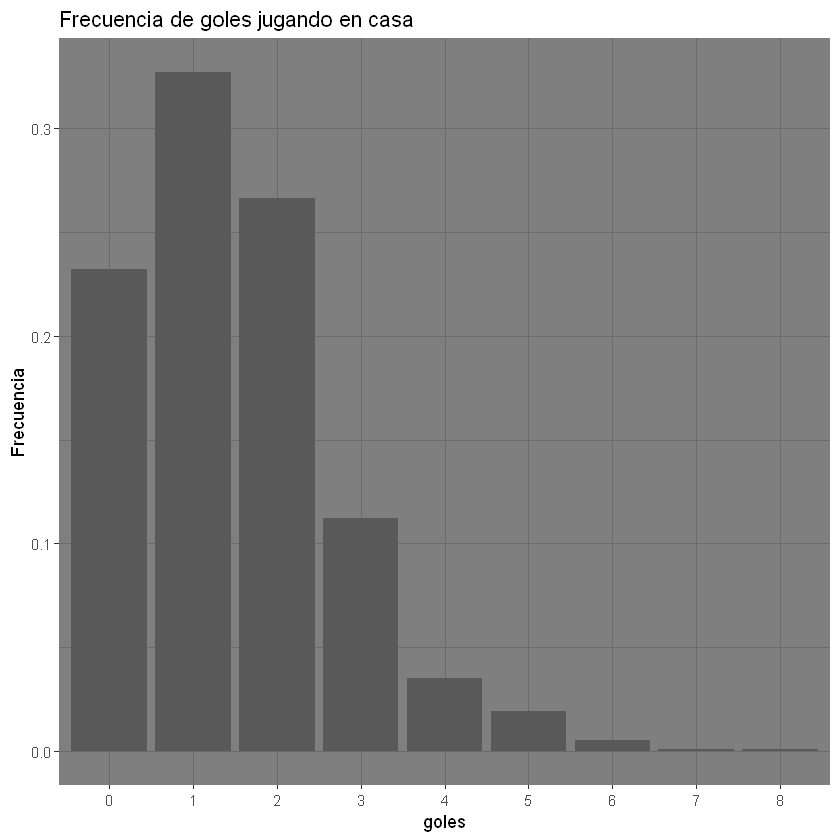

In [9]:
bar_casa <- ggplot(prob_casa, aes(x=goles, y=Freq)) +
  geom_bar(stat='identity') +
  ylab("Frecuencia") +
  theme_dark() +
  ggtitle("Frecuencia de goles jugando en casa")
bar_casa

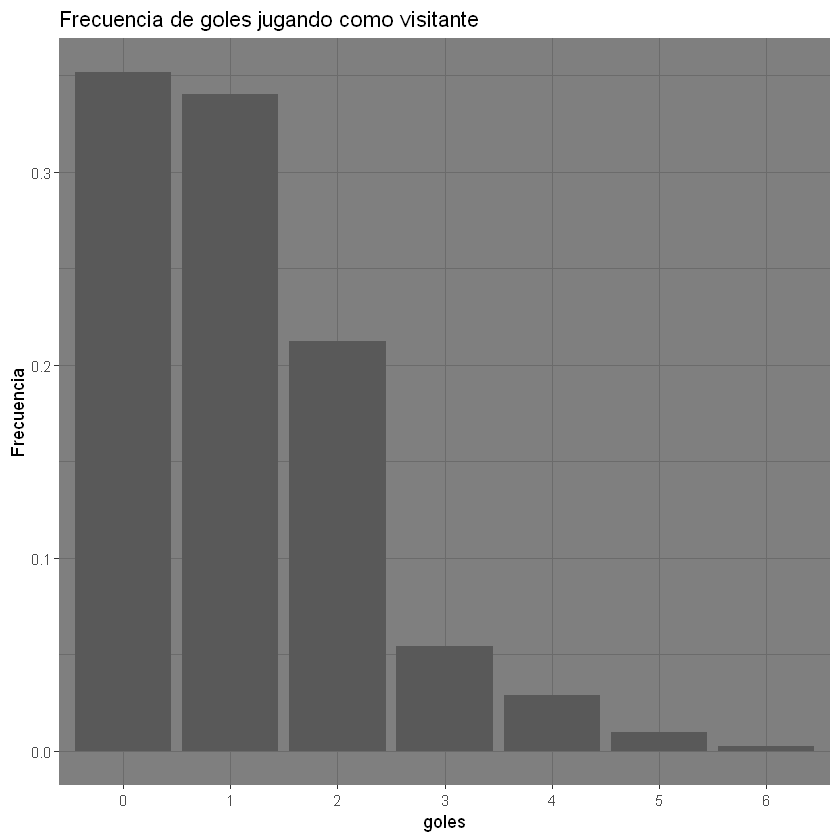

In [10]:
bar_visitante <- ggplot(prob_visitante, aes(x=goles, y=Freq)) +
  geom_bar(stat='identity') +
  ylab("Frecuencia") +
  theme_dark() +
  ggtitle("Frecuencia de goles jugando como visitante")
bar_visitante

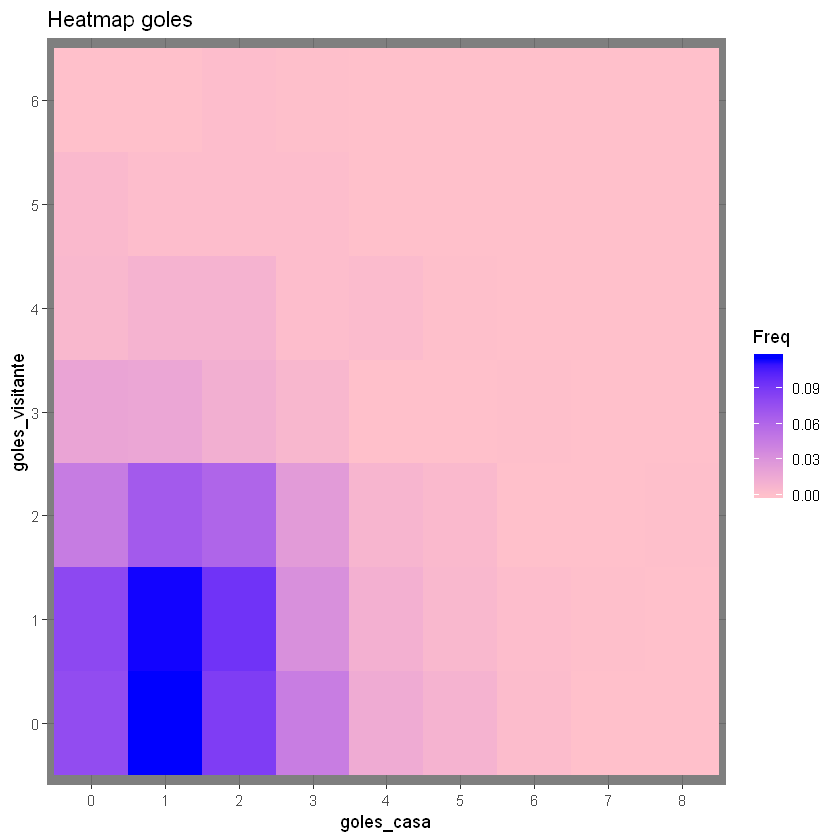

In [15]:
heat_conjunta <- ggplot(prob_conjunta, aes(x=goles_casa, y=goles_visitante, fill=Freq)) +
  geom_tile() +
  ggtitle("Heatmap goles") +
  scale_fill_gradient(low="pink", high="blue") +
  theme_dark()
heat_conjunta